In [1]:
import data_viz
import preprocessor
import pandas as pd
import matplotlib.pyplot as plt

In [5]:

project_path = r"/Users/loucamalerba/Desktop/IMPORTANT/CentraleSupelec/Cours 2A/Machine Learning Casa/Projet_ML_Casa/"
ORY_dataset_path = project_path + r"make_dataset/flights_history_last_12_months_ORY.csv"
ORY_df = preprocessor.make_df(ORY_dataset_path)
BVA_dataset_path = project_path + r"make_dataset/flights_history_last_12_months_BVA.csv"
BVA_df = preprocessor.make_df(BVA_dataset_path)
CDG_dataset_path = project_path + r"make_dataset/flights_history_last_12_months_CDG.csv"
CDG_df = preprocessor.make_df(CDG_dataset_path)


dataset_df = pd.concat([ORY_df, BVA_df, CDG_df])

#dataset_df.drop(["Flight Number", "Airline Name", "Airline ICAO Code", "Departure Airport IATA", "Departure Airport ICAO", "Arrival Airport ICAO"], inplace=True, axis=1)
dataset_df.drop(["Airline Name", "Airline ICAO Code", "Departure Airport ICAO", "Arrival Airport ICAO"], inplace=True, axis=1)
preprocessor.convert_date_columns(dataset_df, ["Scheduled Departure Time", "Estimated Departure Time", "Actual Departure Time", "Scheduled Arrival Time", "Estimated Arrival Time"])
preprocessor.make_departure_delay_column(dataset_df)
preprocessor.make_estimated_departure_delay_column(dataset_df)
dataset_df["Is Actual Departure Time Nan"] = dataset_df["Actual Departure Time"].isna()
dataset_df["Is Estimated Departure Time Nan"] = dataset_df["Estimated Departure Time"].isna()
dataset_df["Is Departure Gate Nan"] = dataset_df["Departure Gate"].isna()


AttributeError: module 'preprocessor' has no attribute 'preprocess_dataset'

In [3]:
dataset_df[dataset_df["Flight Status"] == "cancelled"]

,Flight Number,Airline IATA Code,Departure Airport IATA,Departure Terminal,Departure Gate,Scheduled Departure Time,Estimated Departure Time,Actual Departure Time,Arrival Airport IATA,Scheduled Arrival Time,Estimated Arrival Time,Flight Status,Departure Delay,Estimated Departure Delay,Is Actual Departure Time Nan,Is Estimated Departure Time Nan,Is Departure Gate Nan
303,af6120,af,ory,3,c18,2024-04-15 16:30:00,2024-04-15 16:48:00,NaT,tls,2024-04-15 17:45:00,NaT,cancelled,NaN,18.0,True,False,False
491,tu9001,tu,ory,NaN,NaN,2024-04-15 21:40:00,NaT,NaT,lju,2024-04-15 22:58:00,NaT,cancelled,NaN,NaN,True,True,True
509,ib5582,ib,ory,orly,NaN,2024-04-16 06:30:00,NaT,NaT,fco,2024-04-16 08:35:00,NaT,cancelled,NaN,NaN,True,True,True
510,la5898,la,ory,orly,NaN,2024-04-16 06:30:00,NaT,NaT,fco,2024-04-16 08:35:00,NaT,cancelled,NaN,NaN,True,True,True
511,qr3745,qr,ory,orly,NaN,2024-04-16 06:30:00,NaT,NaT,fco,2024-04-16 08:35:00,NaT,cancelled,NaN,NaN,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889078,fi543,fi,cdg,1,NaN,2025-04-11 14:00:00,NaT,NaT,kef,2025-04-11 15:35:00,NaT,cancelled,NaN,NaN,True,True,True
889515,dl8548,dl,cdg,2e,l22,2025-04-11 16:40:00,2025-04-11 16:50:00,NaT,iad,2025-04-11 19:15:00,NaT,cancelled,NaN,10.0,True,False,False
889516,kl2243,kl,cdg,2e,l22,2025-04-11 16:40:00,2025-04-11 16:50:00,NaT,iad,2025-04-11 19:15:00,NaT,cancelled,NaN,10.0,True,False,False
889517,vs6758,vs,cdg,2e,l22,2025-04-11 16:40:00,2025-04-11 16:50:00,NaT,iad,2025-04-11 19:15:00,NaT,cancelled,NaN,10.0,True,False,False


In [4]:
grouped_df = preprocessor.group_flights_optimized(dataset_df)

Processing Groups:   2%|▏         | 7609/362819 [00:03<02:28, 2399.53it/s]


KeyboardInterrupt: 

In [ ]:
grouped_df[grouped_df["Flight Status"] != "active"]

,Scheduled Departure Time,Departure Gate,Arrival Airport IATA,Flight Number,Airline IATA Code,Departure Airport IATA,Departure Terminal,Estimated Departure Time,Actual Departure Time,Scheduled Arrival Time,Estimated Arrival Time,Flight Status,Departure Delay,Estimated Departure Delay,Is Actual Departure Time Nan,Is Estimated Departure Time Nan,Is Departure Gate Nan
59,2024-04-15 07:35:00,e05,lhr,"[am5976, dl8718, kq3218, mk9412, uu8680, vs670...","[am, dl, kq, mk, uu, vs, af]",cdg,2e,NaT,NaT,2024-04-15 08:00:00,NaT,cancelled,NaN,NaN,True,True,False
248,2024-04-15 11:00:00,c89,dss,[hc4040],[hc],cdg,2c,NaT,NaT,2024-04-15 15:00:00,NaT,unknown,NaN,NaN,True,True,False
273,2024-04-15 11:30:00,c87,dss,[hc4041],[hc],cdg,2c,NaT,NaT,2024-04-15 15:30:00,NaT,unknown,NaN,NaN,True,True,False
322,2024-04-15 12:15:00,f05,ams,"[am5925, dl8537, g35010, ga9543, kl2012, mk939...","[am, dl, g3, ga, kl, mk, af]",cdg,2f,NaT,NaT,2024-04-15 13:40:00,NaT,cancelled,NaN,NaN,True,True,False
434,2024-04-15 14:10:00,64,pdl,"[tp6509, af9565, s4513]","[tp, af, s4]",cdg,1,2024-04-15 14:55:00,NaT,2024-04-15 16:05:00,NaT,cancelled,NaN,45.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267396,2025-04-10 10:30:00,e08,yul,"[dl8373, kl2040, me4342, vs6822, af342]","[dl, kl, me, vs, af]",cdg,2e,NaT,NaT,2025-04-10 12:05:00,NaT,cancelled,NaN,NaN,True,True,False
268038,2025-04-10 22:50:00,e05,pnr,[af928],[af],cdg,2e,NaT,NaT,2025-04-11 06:05:00,NaT,cancelled,NaN,NaN,True,True,False
268503,2025-04-11 14:15:00,61,muc,"[lh4119, vl2231]","[lh, vl]",cdg,1,NaT,NaT,2025-04-11 15:45:00,NaT,unknown,NaN,NaN,True,True,False
268631,2025-04-11 16:40:00,l22,iad,"[dl8548, kl2243, vs6758, af52]","[dl, kl, vs, af]",cdg,2e,2025-04-11 16:50:00,NaT,2025-04-11 19:15:00,NaT,cancelled,NaN,10.0,True,False,False


In [ ]:
# def group_flights(dataset_df):
#     empty_df = pd.DataFrame(columns=dataset_df.columns)

#     unique_sch_dts = dataset_df["Scheduled Departure Time"].unique()
    
#     i = 0
#     for sch_dt in unique_sch_dts:
#         i+=1
#         if i%100 == 0:
#             print(f"{i/len(unique_sch_dts)*100}")
#         Grouper par sch dt:
#         grouped_by_sch_dt = dataset_df[dataset_df["Scheduled Departure Time"] == sch_dt]
#         unique_dep_gate = grouped_by_sch_dt["Departure Gate"].unique()
#         for dep_gate in unique_dep_gate:
#             Grouper par dep gate:
#             grouped_by_dep_gate = grouped_by_sch_dt[grouped_by_sch_dt["Departure Gate"] == dep_gate]
#             unique_arr_airports_iatas = grouped_by_dep_gate["Arrival Airport IATA"].unique()
#             for arr_airport_iata in unique_arr_airports_iatas:
#                 grouped_by_arr_airport_aita = grouped_by_dep_gate[grouped_by_dep_gate["Arrival Airport IATA"] == arr_airport_iata]
                


#                 flight_numbers = grouped_by_arr_airport_aita["Flight Number"].unique()
#                 airline_iatas = grouped_by_arr_airport_aita["Airline IATA Code"].unique()
#                 new_row = {}
#                 for column in empty_df.columns:
#                     if column == "Flight Number":
#                         new_row["Flight Number"] = [flight_numbers]
#                     elif column == "Airline IATA Code":
#                         new_row["Airline IATA Code"] = [airline_iatas]
#                     else:
#                         if len(grouped_by_arr_airport_aita[column].unique()) == 1:
#                             if not str(column) in new_row.keys():
#                                 new_row[str(column)] = []
#                             new_row[str(column)].append(grouped_by_arr_airport_aita[column].unique()[0])
#                         else:
#                             assert "error"
                        
#                 empty_df = pd.concat([empty_df, pd.DataFrame(new_row)], ignore_index=True)

       
# group_flights(dataset_df)

/var/folders/0f/_m882q4510j6hp59n90vxvzm0000gn/T/ipykernel_24189/4239051411.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  empty_df = pd.concat([empty_df, pd.DataFrame(new_row)], ignore_index=True)


0.11876484560570072
0.23752969121140144
0.35629453681710216
0.4750593824228029
0.5938242280285035
0.7125890736342043
0.831353919239905
0.9501187648456058
1.0688836104513064
1.187648456057007
1.3064133016627077
1.4251781472684086
1.5439429928741093
1.66270783847981
1.7814726840855106
1.9002375296912115
2.019002375296912
2.137767220902613
2.2565320665083135
2.375296912114014
2.494061757719715
2.6128266033254155
2.7315914489311166
2.8503562945368173
2.9691211401425175
3.0878859857482186
3.2066508313539197
3.32541567695962
3.44418052256532
3.5629453681710213
3.681710213776722
3.800475059382423
3.9192399049881232
4.038004750593824
4.156769596199525
4.275534441805226
4.394299287410926
4.513064133016627
4.631828978622328
4.750593824228028
4.86935866983373
4.98812351543943
5.10688836104513
5.225653206650831
5.344418052256532
5.463182897862233
5.581947743467933
5.7007125890736345
5.819477434679335
5.938242280285035
6.0570071258907365
6.175771971496437
6.294536817102138
6.413301662707839
6.53206

KeyboardInterrupt: 

,Scheduled Departure Time,Departure Airport IATA,Departure Terminal,Departure Gate,Estimated Departure Time,Actual Departure Time,Arrival Airport IATA,Scheduled Arrival Time,Estimated Arrival Time,Flight Status,Departure Delay,Estimated Departure Delay,Is Actual Departure Time Nan,Is Estimated Departure Time Nan,Is Departure Gate Nan,Airline_Names,Flight_Numbers
216358,2025-04-11 16:25:00,cdg,2f,f05,2025-04-11 16:48:00,2025-04-11 16:52:00,bud,2025-04-11 18:35:00,2025-04-11 18:40:00,active,27.0,23.0,False,False,False,"dl, sk, uu, af","dl8762, sk9740, uu8494, af1494"
216359,2025-04-11 16:25:00,cdg,2g,g25,2025-04-11 16:42:00,2025-04-11 16:31:00,fra,2025-04-11 17:45:00,2025-04-11 17:22:00,active,6.0,17.0,False,False,False,"am, dl, mk, sk, uu, vn, ws, af","am6017, dl8285, mk9384, sk9753, uu8318, vn3276..."
216360,2025-04-11 16:30:00,ory,4,f23,2025-04-11 16:58:00,2025-04-11 17:11:00,run,2025-04-12 05:35:00,2025-04-12 05:44:00,active,41.0,28.0,False,False,False,"tx, bf","tx6702, bf702"
216361,2025-04-11 16:30:00,ory,3,d18,2025-04-11 16:41:00,2025-04-11 16:53:00,run,2025-04-12 05:30:00,2025-04-12 05:29:00,active,23.0,11.0,False,False,False,"kl, af","kl2240, af648"
216362,2025-04-11 16:30:00,cdg,2e,m41,2025-04-11 16:27:00,2025-04-11 16:47:00,jfk,2025-04-11 18:45:00,2025-04-11 18:17:00,active,17.0,-3.0,False,False,False,"dl, kl, vs, af","dl8746, kl2307, vs6704, af8"
216363,2025-04-11 16:35:00,cdg,2f,f05,2025-04-11 16:52:00,2025-04-11 16:50:00,bod,2025-04-11 17:50:00,2025-04-11 17:41:00,active,15.0,17.0,False,False,False,"am, ar, ay, az, dl, mk, sk, af","am5854, ar7824, ay6327, az2610, dl8490, mk9018..."
216364,2025-04-11 16:35:00,cdg,2g,g38,2025-04-11 16:57:00,2025-04-11 17:06:00,ham,2025-04-11 18:10:00,2025-04-11 18:21:00,active,31.0,22.0,False,False,False,"am, dl, ke, kq, uu, ws, af","am5713, dl8480, ke6391, kq3852, uu8510, ws5041..."
216365,2025-04-11 16:35:00,ory,3,e12,2025-04-11 16:47:00,2025-04-11 16:39:00,mpl,2025-04-11 17:55:00,2025-04-11 17:39:00,active,4.0,12.0,False,False,False,hv,hv7136
216366,2025-04-11 16:40:00,cdg,2b,b26,2025-04-11 16:57:00,2025-04-11 17:08:00,lgw,2025-04-11 16:55:00,2025-04-11 16:51:00,active,28.0,17.0,False,False,False,u2,u28404
216367,2025-04-11 16:40:00,cdg,2f,f05,2025-04-11 16:40:00,2025-04-11 16:53:00,lys,2025-04-11 17:45:00,2025-04-11 17:38:00,active,13.0,0.0,False,False,False,"am, ar, ay, dl, fb, g3, ro, sk, ws, af","am5858, ar7826, ay6321, dl8683, fb1563, g35099..."


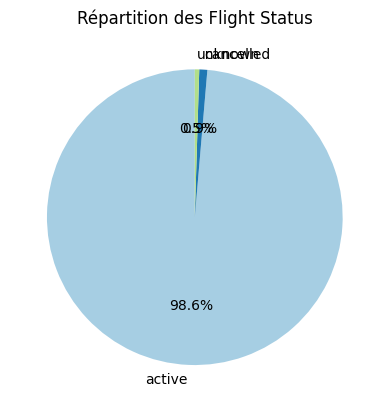

In [ ]:
data_viz.camembert_colonne(dataset_df, "Flight Status", titre="Répartition des Flight Status")

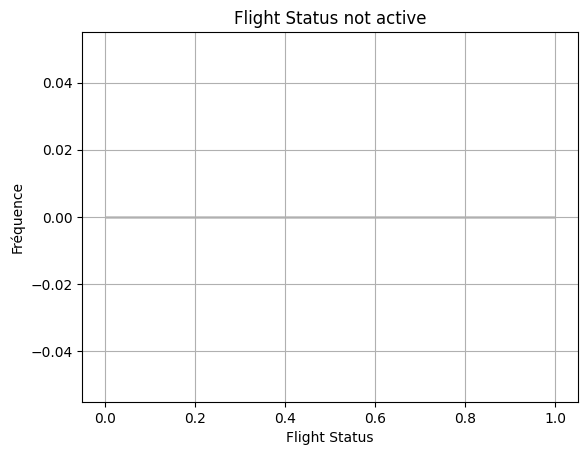

In [ ]:
data_viz.make_column_hist(dataset_df[dataset_df["Flight Status"] != "active"], "Flight Status", title="Flight Status not active")

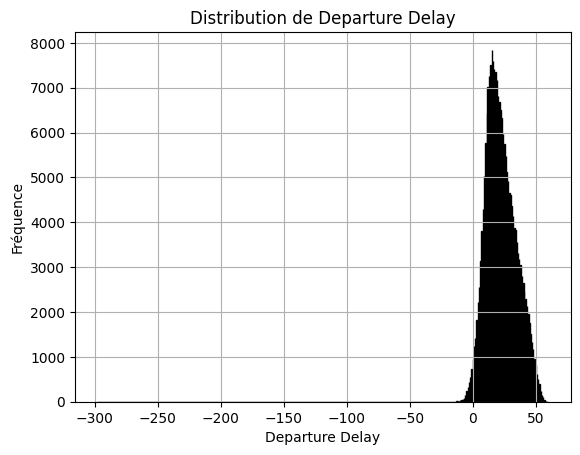

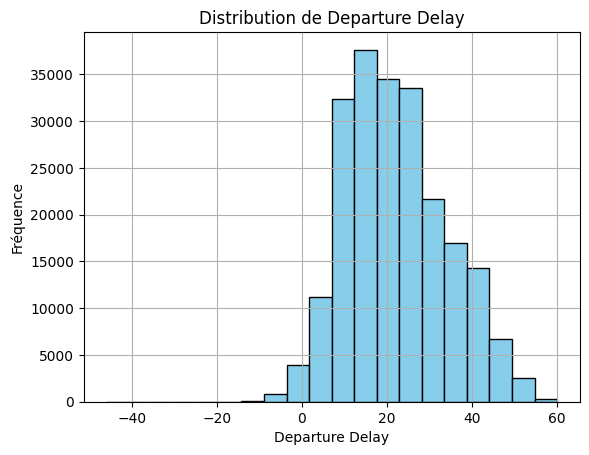

In [ ]:
data_viz.make_column_hist(dataset_df, "Departure Delay", bins=1000)
data_viz.make_column_hist(dataset_df[dataset_df["Departure Delay"] > -50], "Departure Delay", bins=20)

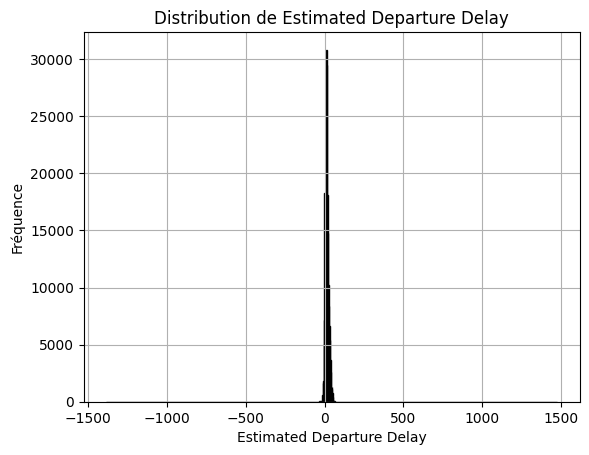

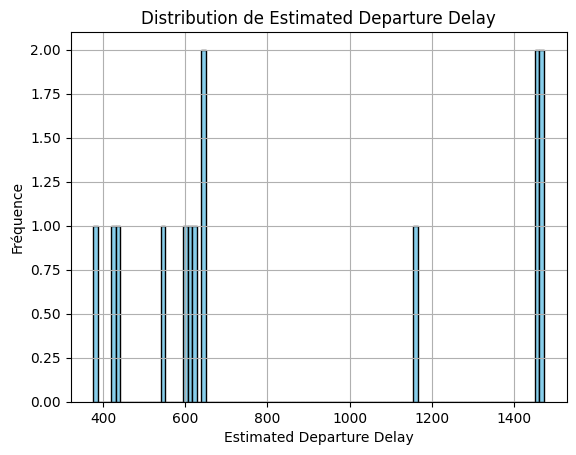

In [ ]:
data_viz.make_column_hist(dataset_df, "Estimated Departure Delay", bins=1000)
data_viz.make_column_hist(dataset_df[dataset_df["Estimated Departure Delay"] > 180], "Estimated Departure Delay", bins=100)

In [8]:
dataset_df[(dataset_df["Estimated Departure Delay"] > 0) & (dataset_df["Actual Departure Time"].isna())][-20:]

,Scheduled Departure Time,Departure Airport IATA,Departure Terminal,Departure Gate,Estimated Departure Time,Actual Departure Time,Arrival Airport IATA,Scheduled Arrival Time,Estimated Arrival Time,Flight Status,Departure Delay,Estimated Departure Delay,Is Actual Departure Time Nan,Is Estimated Departure Time Nan,Is Departure Gate Nan,Airline_Names,Flight_Numbers


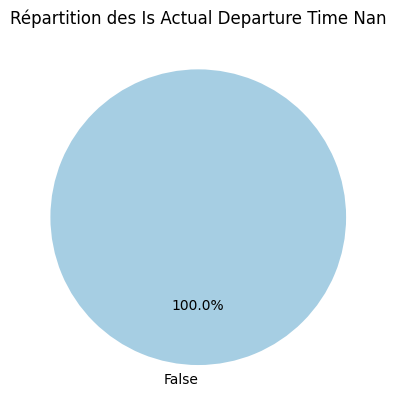

,Scheduled Departure Time,Departure Airport IATA,Departure Terminal,Departure Gate,Estimated Departure Time,Actual Departure Time,Arrival Airport IATA,Scheduled Arrival Time,Estimated Arrival Time,Flight Status,Departure Delay,Estimated Departure Delay,Is Actual Departure Time Nan,Is Estimated Departure Time Nan,Is Departure Gate Nan,Airline_Names,Flight_Numbers


In [ ]:
data_viz.camembert_colonne(dataset_df, "Is Actual Departure Time Nan", titre="Répartition des Is Actual Departure Time Nan")
dataset_df[dataset_df["Actual Departure Time"].isna()]

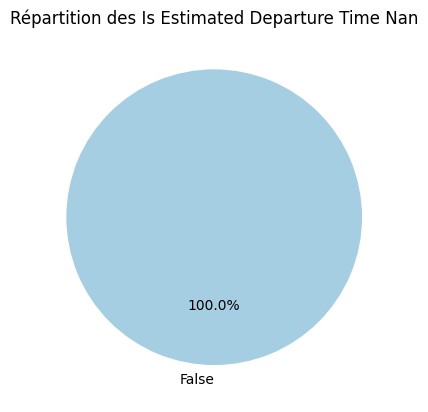

,Scheduled Departure Time,Departure Airport IATA,Departure Terminal,Departure Gate,Estimated Departure Time,Actual Departure Time,Arrival Airport IATA,Scheduled Arrival Time,Estimated Arrival Time,Flight Status,Departure Delay,Estimated Departure Delay,Is Actual Departure Time Nan,Is Estimated Departure Time Nan,Is Departure Gate Nan,Airline_Names,Flight_Numbers


In [ ]:

data_viz.camembert_colonne(dataset_df, "Is Estimated Departure Time Nan", titre="Répartition des Is Estimated Departure Time Nan")
dataset_df[dataset_df["Estimated Departure Time"].isna()]

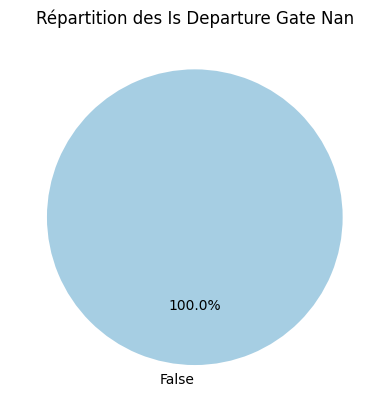

,Scheduled Departure Time,Departure Airport IATA,Departure Terminal,Departure Gate,Estimated Departure Time,Actual Departure Time,Arrival Airport IATA,Scheduled Arrival Time,Estimated Arrival Time,Flight Status,Departure Delay,Estimated Departure Delay,Is Actual Departure Time Nan,Is Estimated Departure Time Nan,Is Departure Gate Nan,Airline_Names,Flight_Numbers


In [ ]:

data_viz.camembert_colonne(dataset_df, "Is Departure Gate Nan", titre="Répartition des Is Departure Gate Nan")
dataset_df[dataset_df["Departure Gate"].isna()]

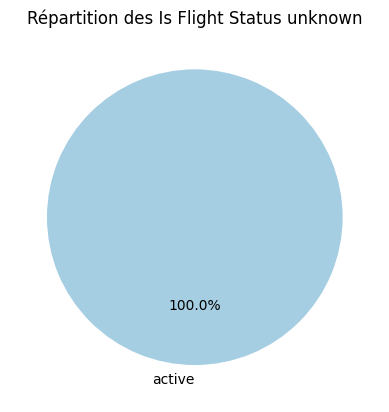

,Scheduled Departure Time,Departure Airport IATA,Departure Terminal,Departure Gate,Estimated Departure Time,Actual Departure Time,Arrival Airport IATA,Scheduled Arrival Time,Estimated Arrival Time,Flight Status,Departure Delay,Estimated Departure Delay,Is Actual Departure Time Nan,Is Estimated Departure Time Nan,Is Departure Gate Nan,Airline_Names,Flight_Numbers


In [ ]:
data_viz.camembert_colonne(dataset_df, "Flight Status", titre="Répartition des Is Flight Status unknown")
dataset_df[dataset_df["Flight Status"] == "unknown"][-20:]

In [14]:
dataset_df[dataset_df["Departure Terminal"].isna()]

,Scheduled Departure Time,Departure Airport IATA,Departure Terminal,Departure Gate,Estimated Departure Time,Actual Departure Time,Arrival Airport IATA,Scheduled Arrival Time,Estimated Arrival Time,Flight Status,Departure Delay,Estimated Departure Delay,Is Actual Departure Time Nan,Is Estimated Departure Time Nan,Is Departure Gate Nan,Airline_Names,Flight_Numbers


In [15]:
dataset_df

,Scheduled Departure Time,Departure Airport IATA,Departure Terminal,Departure Gate,Estimated Departure Time,Actual Departure Time,Arrival Airport IATA,Scheduled Arrival Time,Estimated Arrival Time,Flight Status,Departure Delay,Estimated Departure Delay,Is Actual Departure Time Nan,Is Estimated Departure Time Nan,Is Departure Gate Nan,Airline_Names,Flight_Numbers
0,2024-04-15 05:45:00,cdg,3,11,2024-04-15 05:39:00,2024-04-15 05:52:00,mad,2024-04-15 07:55:00,2024-04-15 07:30:00,active,7.0,-6.0,False,False,False,"vy, ib","vy5095, ib3431"
1,2024-04-15 06:00:00,ory,orly,e03,2024-04-15 06:12:00,2024-04-15 06:06:00,dbv,2024-04-15 08:25:00,2024-04-15 08:00:00,active,6.0,12.0,False,False,False,hv,hv4200
2,2024-04-15 06:00:00,ory,orly,e04,2024-04-15 06:10:00,2024-04-15 06:09:00,pmo,2024-04-15 08:25:00,2024-04-15 08:09:00,active,9.0,10.0,False,False,False,hv,hv3810
3,2024-04-15 06:00:00,ory,orly,e07,2024-04-15 06:14:00,2024-04-15 06:32:00,bcn,2024-04-15 07:40:00,2024-04-15 07:54:00,active,32.0,14.0,False,False,False,dx,dx4750
4,2024-04-15 06:05:00,ory,orly,e6c,2024-04-15 06:24:00,2024-04-15 06:45:00,chq,2024-04-15 10:30:00,2024-04-15 10:49:00,active,40.0,19.0,False,False,False,ed,ed3530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216603,2025-04-11 23:20:00,cdg,2e,e03,2025-04-11 23:46:00,2025-04-12 00:01:00,scl,2025-04-12 07:45:00,2025-04-12 07:52:00,active,41.0,26.0,False,False,False,"kl, af","kl2258, af406"
216604,2025-04-11 23:20:00,cdg,2e,e03,2025-04-12 00:15:00,2025-04-12 00:13:00,hkg,2025-04-12 17:30:00,2025-04-12 17:46:00,active,53.0,55.0,False,False,False,"kl, qf, af","kl2156, qf4224, af188"
216605,2025-04-11 23:25:00,cdg,2e,e04,2025-04-11 23:35:00,2025-04-11 23:46:00,orn,2025-04-12 01:05:00,2025-04-12 00:55:00,active,21.0,10.0,False,False,False,af,af1430
216606,2025-04-11 23:25:00,cdg,2e,e03,2025-04-11 23:22:00,2025-04-11 23:36:00,gru,2025-04-12 06:15:00,2025-04-12 05:55:00,active,11.0,-3.0,False,False,False,"kl, mu, sk, af","kl2415, mu1651, sk9959, af454"
